In [1]:
#  Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Downloadable from: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', header=None, names=['label', 'message'])


In [ ]:
#  Data Understanding
print("\nDataset Preview:")
print(df.head())
print("\nClass Distribution:")
print(df['label'].value_counts())


Dataset Preview:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


In [4]:
# Convert labels to binary
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [5]:
# Feature extraction using Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label_num']

In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# Train Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)


In [8]:
# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9829596412556054

Confusion Matrix:
 [[955  11]
 [  8 141]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.95      0.94       149

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



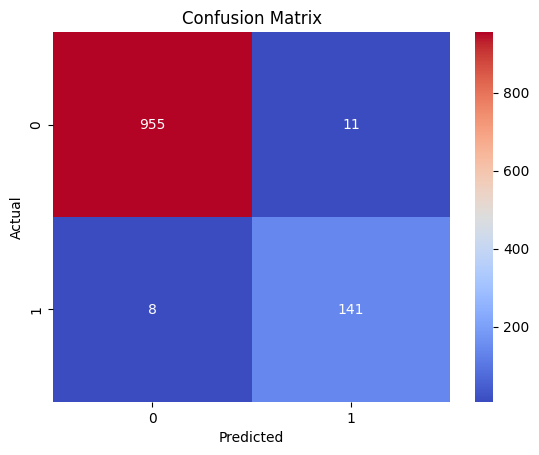

In [9]:
#  Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()